<a href="https://colab.research.google.com/github/yashasangani/Machine-Learning/blob/main/Feature_scaling_Normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df= pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day25-normalization/wine_data.csv',header =None,usecols=[0,1,2])

In [18]:
df.columns = ['Class label','Alcohol','Malic Acid']
df

,Class label,Alcohol,Malic Acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


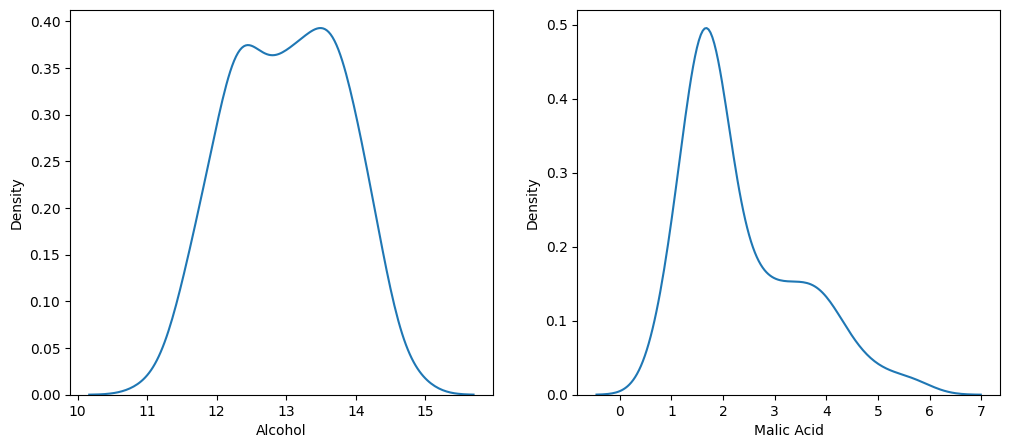

In [19]:
fd, (ax1,ax2)= plt.subplots(ncols=2,figsize=(12,5))
sns.kdeplot(df['Alcohol'],ax = ax1)
sns.kdeplot(df["Malic Acid"],ax = ax2)
plt.show()

<Axes: xlabel='Alcohol', ylabel='Malic Acid'>

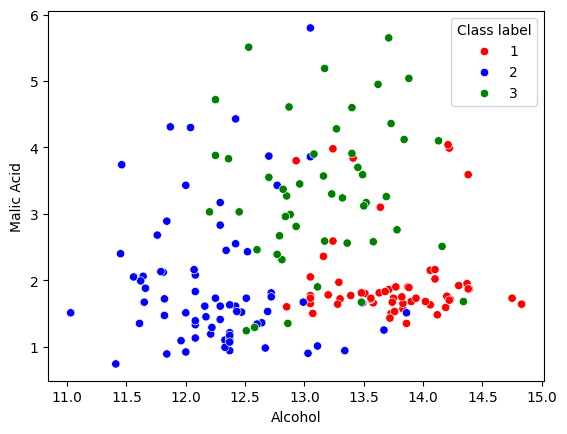

In [21]:
color_dict = {1:'red',3:"green",2:'blue'}
sns.scatterplot(x =df['Alcohol'],y=df['Malic Acid'],hue = df["Class label"],palette = color_dict)

In [22]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.drop("Class label",axis = 1),df["Class label"],test_size = 0.2,random_state = 0)

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler = MinMaxScaler()

#fit the scaler to the train set, it will learn parameters
scaler.fit(x_train)

#transform train and test sets
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [25]:
x_train_scaled = pd.DataFrame(x_train_scaled,columns = x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled,columns = x_train.columns)

In [28]:
round(x_train_scaled.describe(),2)

,Alcohol,Malic Acid
count,142.00,142.00
mean,0.53,0.33
std,0.22,0.23
min,0.00,0.00
25%,0.35,0.18
50%,0.54,0.24
75%,0.70,0.51
max,1.00,1.00


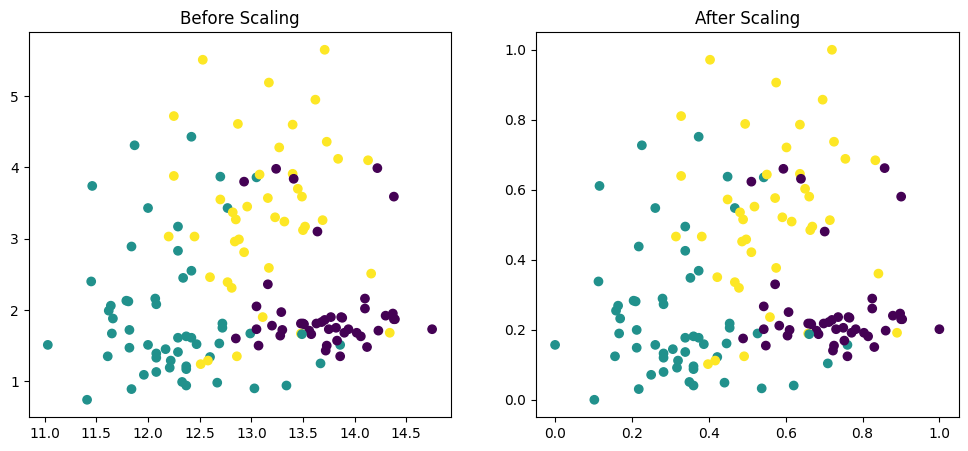

In [36]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(x_train['Alcohol'], x_train['Malic Acid'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(x_train_scaled['Alcohol'], x_train_scaled['Malic Acid'],c=y_train)
ax2.set_title("After Scaling")
plt.show()

In [33]:
y_train

161    3
92     2
94     2
174    3
24     1
      ..
103    2
67     2
117    2
47     1
172    3
Name: Class label, Length: 142, dtype: int64

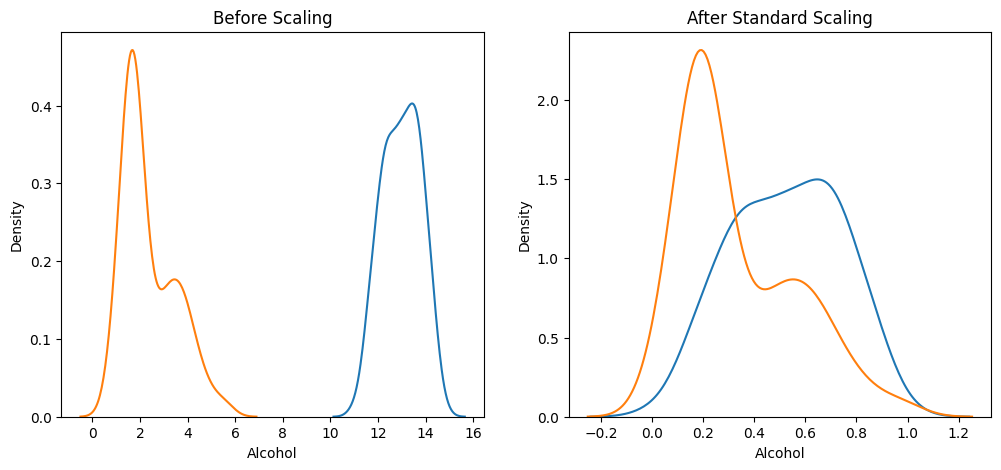

In [39]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Alcohol'], ax=ax1)
sns.kdeplot(x_train['Malic Acid'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(x_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(x_train_scaled['Malic Acid'], ax=ax2)
plt.show()
